In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

## Clean up

We will read the CSV file and then find all the hashtags. At the same time we will also drop all the unwanted columns.

In [2]:
df = pd.read_csv('../data/tweets.csv')

df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   author            52542 non-null  object 
 1   content           52542 non-null  object 
 2   country           36 non-null     object 
 3   date_time         52542 non-null  object 
 4   id                52542 non-null  float64
 5   language          52542 non-null  object 
 6   latitude          1 non-null      float64
 7   longitude         1 non-null      float64
 8   number_of_likes   52542 non-null  int64  
 9   number_of_shares  52542 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 4.0+ MB


From this we can see that the country, longitude and latitude are null. Hence, we will drop these columns.

In [4]:
df.drop(columns=['country', 'latitude', 'longitude'], inplace=True)

verify our actions

In [5]:
df.head()

,author,content,date_time,id,language,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,8.196330e+17,en,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,8.191010e+17,en,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,8.190140e+17,en,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,8.190120e+17,en,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,8.186890e+17,en,17620,4655


We can also drop id column as it isn't serving any purpose in our case.

In [6]:
df.drop(columns='id', inplace=True)


In [7]:
df.head()

,author,content,date_time,language,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,en,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,en,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,en,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,en,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,en,17620,4655


Now lets assign correct dtypes to author

In [8]:
df['author'] = df.author.astype('category')

Converting date time to Year

In [9]:
df['date_time'] = pd.to_datetime(df.date_time)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52542 entries, 0 to 52541
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   author            52542 non-null  category      
 1   content           52542 non-null  object        
 2   date_time         52542 non-null  datetime64[ns]
 3   language          52542 non-null  object        
 4   number_of_likes   52542 non-null  int64         
 5   number_of_shares  52542 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 2.1+ MB


## Hashtag discovery

In this step we will find all the hashtags used in the text of 52542 rows.

In [11]:
just_content = df.content

In [12]:
just_content.head()

0    Is history repeating itself...?#DONTNORMALIZEH...
1    @barackobama Thank you for your incredible gra...
2                  Life goals. https://t.co/XIn1qKMKQl
3              Me right now 🙏🏻 https://t.co/gW55C1wrwd
4    SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...
Name: content, dtype: object

In [13]:
type(just_content)

pandas.core.series.Series

In [37]:
hashtags = {}
count = 0
def get_hashtag(series):
    global count
    regex = r'#\w+'
    results = re.findall(regex, series)
    for result in results:
        year = df.date_time[count].year
        if result not in hashtags:
            hashtags[result] = {'index': [count], 'year': [year]}
        else:
            hashtags[result]['index'].append(count)
            hashtags[result]['year'].append(year)
    count += 1

In [38]:
just_content.map(get_hashtag)

0        None
1        None
2        None
3        None
4        None
         ... 
52537    None
52538    None
52539    None
52540    None
52541    None
Name: content, Length: 52542, dtype: object

In [28]:
df.iloc[165]

author                                          katyperry
content             I'm so glad for #earlyvoting #debates
date_time                             2016-10-10 02:39:00
language                                               en
number_of_likes                                      5259
number_of_shares                                     1204
Name: 165, dtype: object

In [16]:
hashtags

{'#DONTNORMALIZEHATE': {'index': [0], 'year': [2017]},
 '#fourmoreyears': {'index': [5], 'year': [2017]},
 '#jenniferholliday': {'index': [28], 'year': [2016]},
 '#Thanksgiving': {'index': [29, 30, 22415, 22419],
  'year': [2016, 2016, 2015, 2015]},
 '#IStandWithStandingRock': {'index': [29], 'year': [2016]},
 '#thanksgivingdayclapback': {'index': [33], 'year': [2016]},
 '#LOVETRUMPSHATE': {'index': [50], 'year': [2016]},
 '#Yeson64': {'index': [58], 'year': [2016]},
 '#HERstory': {'index': [63], 'year': [2016]},
 '#november8th': {'index': [63], 'year': [2016]},
 '#LoveTrumpsHate': {'index': [67, 15932, 15934], 'year': [2016, 2016, 2016]},
 '#IMWITHME': {'index': [77], 'year': [2016]},
 '#childrenfirst': {'index': [81], 'year': [2016]},
 '#debates': {'index': [123,
   142,
   145,
   165,
   175,
   179,
   188,
   225,
   230,
   233,
   237,
   18779,
   21648,
   21678,
   21679,
   21680,
   21681,
   21682,
   21683,
   21695,
   21696,
   21697,
   21714,
   21717,
   21718,
   2

In [19]:
df_debates = df.loc[hashtags['#debates']['index']]

In [20]:
df_debates.sort_values(by='date_time')

,author,content,date_time,language,number_of_likes,number_of_shares
22884,Twitter,The final debate generated 6.5 million Tweets ...,2012-10-23 03:30:00,en,172,628
21697,Twitter,Streaming LIVE in two hours:\r\n\r\n@timkaine\...,2016-04-10 23:00:00,en,367,150
21696,Twitter,Streaming LIVE:\r\n\r\n@timkaine\r\n#debates \...,2016-05-10 01:04:00,en,504,208
21695,Twitter,"The #debates continue, LIVE on Twitter. \r\n\r...",2016-05-10 02:37:00,en,507,156
21683,Twitter,Tomorrow night: the presidential #debates are ...,2016-08-10 16:15:00,en,1862,763
21682,Twitter,Tonight: the second of the US presidential #de...,2016-09-10 14:50:00,en,5161,3795
21725,Twitter,Watch the US presidential #debates LIVE on Twi...,2016-09-23 17:30:00,en,1258,606
21722,Twitter,Tomorrow night.\r\n\r\nThe US presidential #de...,2016-09-25 14:43:00,en,1167,724
21721,Twitter,Tonight: the first of the US presidential #deb...,2016-09-26 13:20:00,en,2081,1523
21720,Twitter,Streaming LIVE in two hours:\r\n\r\n@HillaryCl...,2016-09-26 23:00:00,en,762,460


In [24]:
df_debates['year'] = df_debates['date_time'].dt.year
df_debates['month'] = df_debates['date_time'].dt.month
df_debates['days'] = df_debates['date_time'].dt.day


In [41]:
df_debates

,author,content,date_time,language,number_of_likes,number_of_shares,year,month,days
123,katyperry,Someone count how many times he is clenching h...,2016-10-20 02:35:00,en,6801,1518,2016,10,20
142,katyperry,YES I LOVE THAT WE ARE GETTING INTO REAL ISSUE...,2016-10-20 01:16:00,en,6024,1454,2016,10,20
145,katyperry,I love when she lays out the rules like the bo...,2016-10-20 01:08:00,en,5896,1472,2016,10,20
165,katyperry,I'm so glad for #earlyvoting #debates,2016-10-10 02:39:00,en,5259,1204,2016,10,10
175,katyperry,I notice these are not built in mics tonight.....,2016-10-10 02:02:00,en,6745,1787,2016,10,10
179,katyperry,RT IF YOU ARE YELLING AT THE TV RIGHT NOW. #de...,2016-10-10 01:45:00,en,14952,9551,2016,10,10
188,katyperry,DON'T SHAKE HIS HAND #debates,2016-10-10 00:55:00,en,9349,2333,2016,10,10
225,katyperry,Sleeping for a week now 👋🏼 #debates,2016-09-27 02:41:00,en,9281,2258,2016,9,27
230,katyperry,This is like watching a frog sitting in water ...,2016-09-27 02:23:00,en,9924,2704,2016,9,27
233,katyperry,". @sallykohn sorry, meditation. I can't even s...",2016-09-27 02:16:00,en,4414,973,2016,9,27


In [43]:
df_debates['days'].nunique()

6

In [35]:
#df_debates.drop(columns=df_debates.columns.difference('date_time', 'content'))
# dir(df_debates.columns)
df_debates.columns.difference(['date_time', 'content'])

Index(['author', 'days', 'language', 'month', 'number_of_likes',
       'number_of_shares', 'year'],
      dtype='object')

In [44]:
df_taylor = df.loc[hashtags['#taylurking']['index']]

In [64]:
df_taylor

,author,content,date_time,language,number_of_likes,number_of_shares,year,month,days
5606,taylorswift13,"In silent screams,\r\nIn wildest dreams,\r\nI ...",2014-03-11 03:54:00,en,11251,3904,2014,3,11
5607,taylorswift13,When I was drowning \r\nThat's when I could fi...,2014-03-11 03:50:00,en,10468,3593,2014,3,11
5608,taylorswift13,"Oh, you got that James Dean daydream \r\nLook ...",2014-03-11 03:41:00,en,10242,3632,2014,3,11
5609,taylorswift13,Look at that face... 😍\r\n\r\n#TS1989 \r\n#tay...,2014-03-11 03:31:00,en,9462,5348,2014,3,11
5610,taylorswift13,Saw you there and I thought \r\nOh \r\nMy \r\n...,2014-03-11 03:22:00,en,10014,3474,2014,3,11
...,...,...,...,...,...,...,...,...,...
5778,taylorswift13,I cyber-stalk because I care. #taylurking http...,2014-10-27 22:50:00,en,17443,6995,2014,10,27
5779,taylorswift13,Just #taylurking around and found these adorab...,2014-10-27 21:44:00,en,12865,5530,2014,10,27
5780,taylorswift13,I love the pics you're posting with the Polaro...,2014-10-27 20:38:00,en,13001,5589,2014,10,27
5781,taylorswift13,Getting ready for the @iHeartRadio Secret Sess...,2014-10-27 20:31:00,en,12198,5364,2014,10,27


In [45]:
df_taylor['year'] = df_taylor['date_time'].dt.year
df_taylor['month'] = df_taylor['date_time'].dt.month
df_taylor['days'] = df_taylor['date_time'].dt.day

In [51]:
df_taylor['days'].nunique()

6

In [76]:
df_taylor.groupby('days').count().index.to_numpy()

array([11, 27, 28, 29, 30, 31], dtype=int64)

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

In [ ]:
import matplotlib.pyplot as plt

In [79]:
unique_values = df_taylor.groupby('days').count().index.to_numpy()
magnitude = df_taylor.groupby('days').count().iloc[:, 1].values

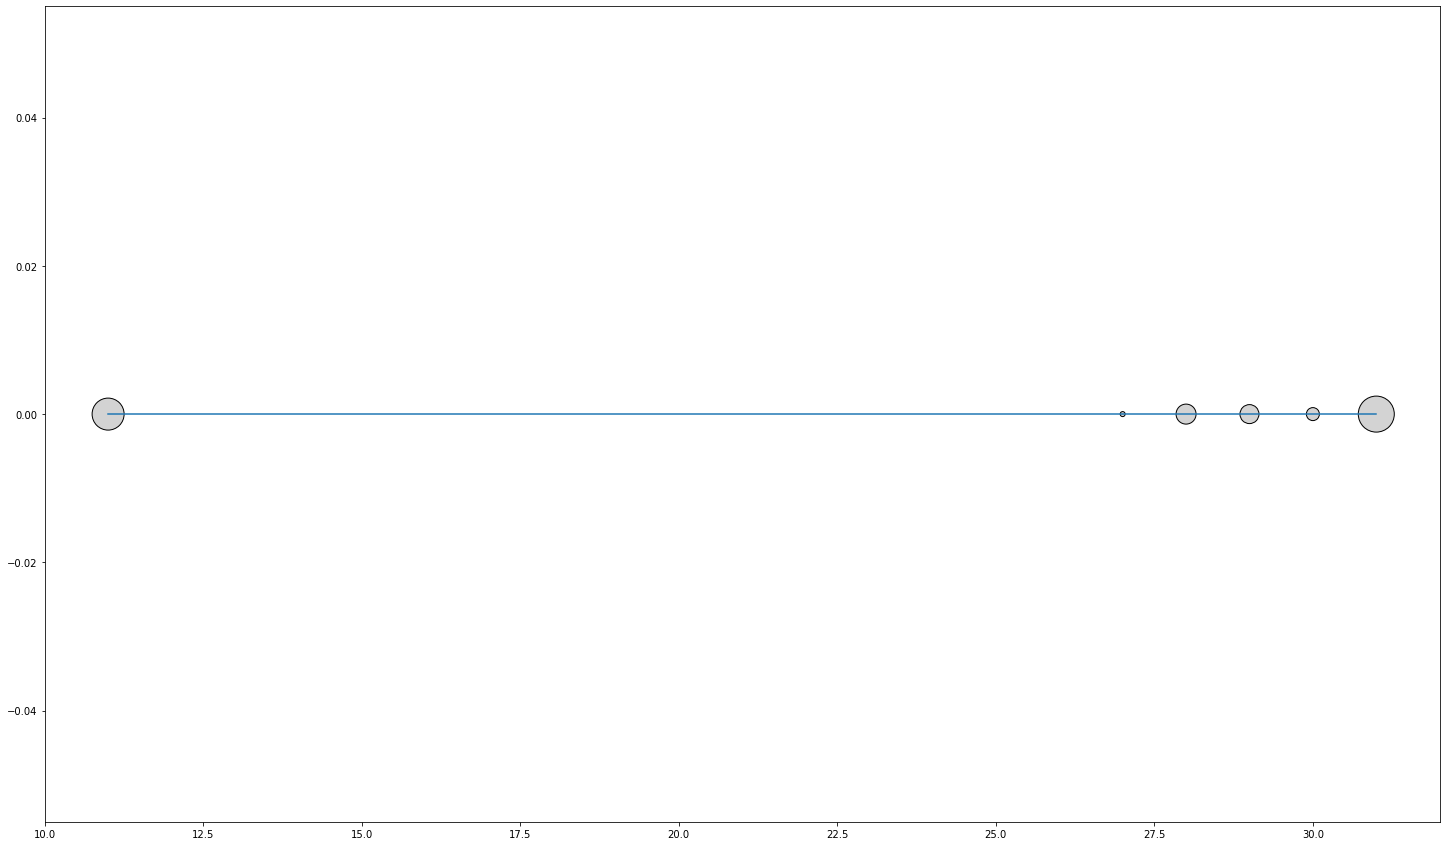

In [82]:
marker_size = np.array([n ** 2 for n in magnitude]).astype(float)
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(unique_values, np.zeros_like(unique_values))
ax.scatter(unique_values, np.zeros_like(unique_values), s=marker_size, edgecolors='k', c='lightgray')
plt.show()

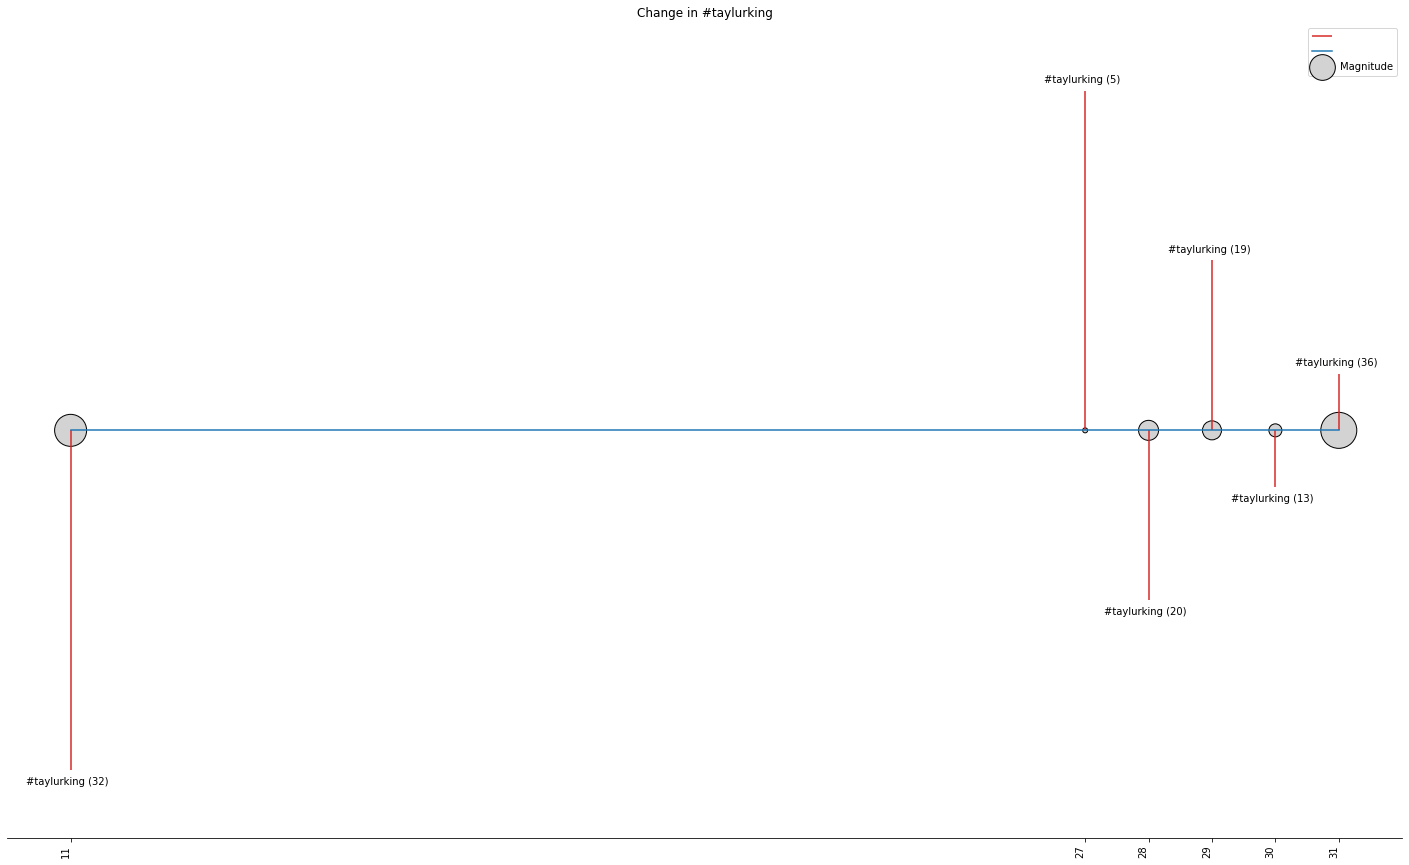

In [84]:
def draw_hashtag_timeline(temp_df: pd.DataFrame, magnitude_key: str, title: str, hashtag: str):
    unique_values = temp_df.groupby(magnitude_key).count().index.to_numpy()
    magnitude = temp_df.groupby(magnitude_key).count().iloc[:, 1].values
    # dates_to_plot = [i for i in temp_df]
    levels = np.tile([-6, 6, -3, 3, -1, 1],
                     int(np.ceil(len(unique_values) / 6)))[:len(unique_values)]

    marker_size = np.array([n ** 2 for n in magnitude]).astype(float)
    fig, ax = plt.subplots(figsize=(25, 15))
    ax.set(title=title)

    # the date_test here is the place where the graph should be
    # 0 is the min
    # levels is the maximum here.
    ax.vlines(unique_values, 0, levels, color="tab:red")

    ax.plot(unique_values, np.zeros_like(unique_values))
    ax.scatter(unique_values, np.zeros_like(unique_values), s=marker_size, edgecolors='k', c='lightgray')
    plt.legend(['', '', 'Magnitude'])

    for d, m, lev in zip(unique_values, magnitude, levels):
        ax.annotate(f'{hashtag} ({m})', xy=(d, lev), xytext=(-3, np.sign(lev) * 6), textcoords="offset points",
                    horizontalalignment="center",
                    verticalalignment="bottom" if lev > 0 else "top", wrap=True)

    ax.set_xticks(unique_values)
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
    # ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    ax.margins(y=0.1)
    plt.show()


draw_hashtag_timeline(df_taylor, 'days', 'Change in #taylurking', '#taylurking')